<a href="https://colab.research.google.com/github/barbaragovei/EstadisticaAplicada_1902869/blob/main/3erParcial_BGS_1902869_EAG42_nov2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Estadistica Aplicada***

***Tercer Parcial***

Barbara Govea Serna 1902869

Grupo 42

In [4]:
# Librerias básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm
%matplotlib inline

In [5]:
# Librerias especializadas
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf,plot_predict
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [6]:
# Formato de gráficas
plt.rcParams['figure.figsize']=(10,6)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.rcParams['axes.labelsize']=12

Has sido contratado como asesor del director de Metrorrey, la empresa encargada de administrar el metro en el área metropolitana de Monterrey, NL.El director te ha proporcionado la siguiente base de datos con la información mensual del número de pasajeros y el ingreso generado por pasajes.

In [7]:
metrorrey = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/datos_metrorrey.csv')
metrorrey

,mes,miles de pasajeros,ingresos (miles de pesos)
0,1995/01,3439.000,3240.000
1,1995/02,2879.000,3623.000
2,1995/03,3103.000,3990.000
3,1995/04,3491.000,3321.000
4,1995/05,3109.000,3777.000
...,...,...,...
339,2023/04,9523.669,38799.657
340,2023/05,11891.646,58511.798
341,2023/06,10657.712,55684.063
342,2023/07,10894.497,56378.304


1. Muestre de que tipo son las variables del dataframe, revise que no haya missing values (de haberlos imputar valores). Cersiorarse que exista una variable fecha, que sea el index y tenga una frecuencia asignada(1.8 puntos)

In [8]:
metrorrey.dtypes

mes                           object
miles de pasajeros           float64
ingresos (miles de pesos)    float64
dtype: object

In [9]:
metrorrey.isna().sum()

mes                          0
miles de pasajeros           0
ingresos (miles de pesos)    0
dtype: int64

In [10]:
# Formato fecha
metrorrey['mes']=pd.to_datetime(metrorrey['mes'],format='%Y/%m')
metrorrey.head(1)

,mes,miles de pasajeros,ingresos (miles de pesos)
0,1995-01-01,3439.0,3240.0


In [11]:
# Fecha index
metrorrey=metrorrey.set_index('mes')
metrorrey.head(1)

,miles de pasajeros,ingresos (miles de pesos)
mes,,
1995-01-01,3439.0,3240.0


In [12]:
# Asignar una frecuencia
metrorrey=metrorrey.asfreq('MS')

2. Análisis  exploratorio.  Utilizando  código  de  Python  genera  un  print()para  cada una de la siguiente información(8 puntos):

a) Rango de fechas

b) Número de observaciones1

c)Valor mínimo y valor máximo del número de pasajeros

In [13]:
min_fecha = metrorrey.index.min()
max_fecha = metrorrey.index.max()
obs = len(metrorrey)
min_pasaj = metrorrey['miles de pasajeros'].min().round()
max_pasaj = metrorrey['miles de pasajeros'].max().round()

In [14]:
print(f'Los datos recolectados fueron {obs}, en un rango de fechas de {min_fecha} a {max_fecha}\nLa cantidad de pasajeros en miles se encuentra en un rango de ({min_pasaj}-{max_pasaj})')

Los datos recolectados fueron 344, en un rango de fechas de 1995-01-01 00:00:00 a 2023-08-01 00:00:00
La cantidad de pasajeros en miles se encuentra en un rango de (2397.0-17535.0)


3. Grafica lo siguiente (8.2 puntos):

a) La serie de miles de pasajeros

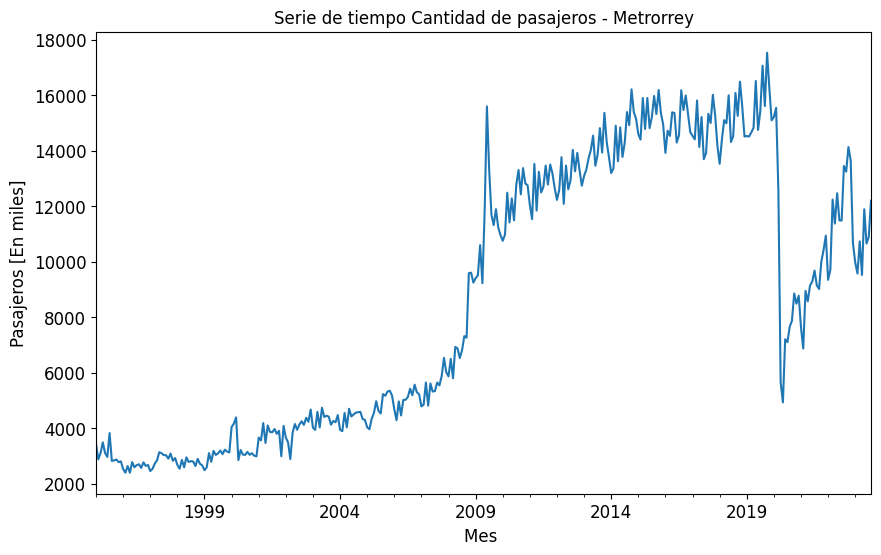

In [15]:
metrorrey['miles de pasajeros'].plot()
plt.title('Serie de tiempo Cantidad de pasajeros - Metrorrey')
plt.ylabel('Pasajeros [En miles]')
plt.xlabel('Mes ')
plt.show()

b) Una media móvil centrada a 7 meses, y explica si la serie tiene tendencia o no, y si existen ciclos (subidas y caídas) y que se debe cada uno.

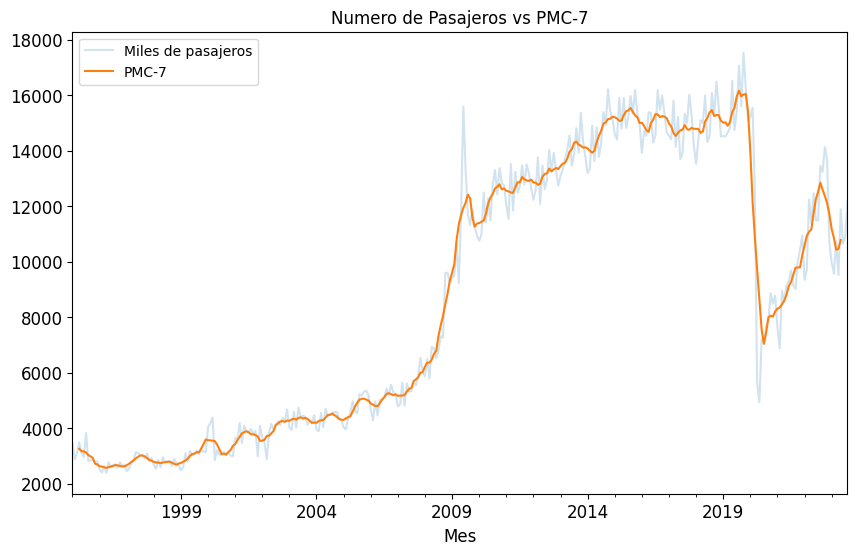

In [16]:
metrorrey['PMC-7'] = metrorrey['miles de pasajeros'].rolling(7,center=True).mean()

metrorrey['miles de pasajeros'].plot(alpha=.2,label='Miles de pasajeros')
metrorrey['PMC-7'].plot(label='PMC-7')

plt.title('Numero de Pasajeros vs PMC-7')
plt.xlabel('Mes')

plt.legend()
plt.show()

4. El director  de  Metrorrey  planea  hacer  mantenimiento  a  las  estaciones  y  los vagones,  pero  no  sabe  la  fecha  adecuada  para  hacerlo.  Utiliza  el  modelo  ETS para  obtener  el  componente  estacional  de  la  serie  y  señala  el  mes  o  meses adecuados para dar mantenimiento (8.2 puntos).

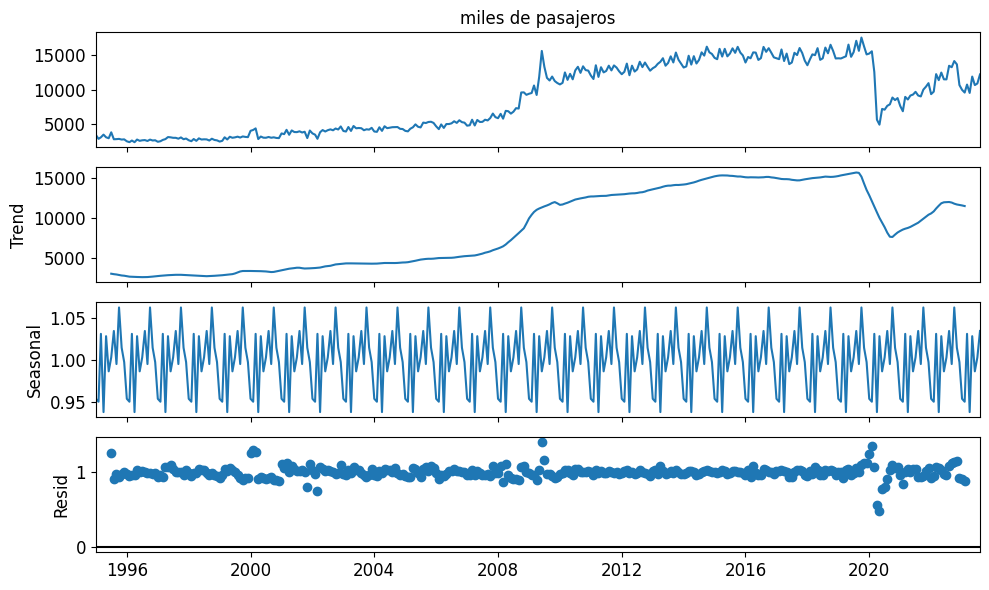

In [17]:
# Tendencia multiplicativa
ets1 = seasonal_decompose(metrorrey['miles de pasajeros'],model='mul')
ets1.plot();

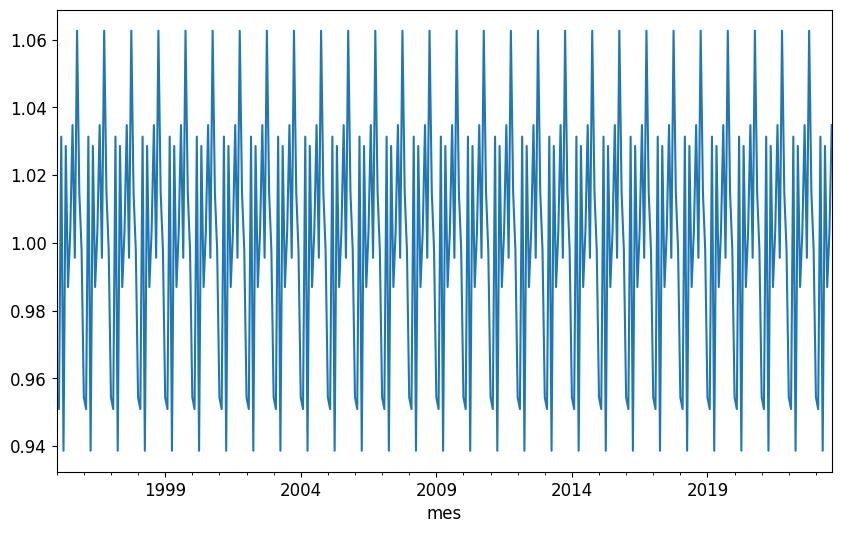

In [18]:
# Accedemos a la estacional
ets1.seasonal.plot();

In [19]:
ets1.seasonal.iloc[0:12]

mes
1995-01-01    0.954408
1995-02-01    0.950919
1995-03-01    1.031340
1995-04-01    0.938619
1995-05-01    1.028585
1995-06-01    0.986927
1995-07-01    1.003497
1995-08-01    1.034753
1995-09-01    0.995570
1995-10-01    1.062610
1995-11-01    1.014896
1995-12-01    0.997875
Freq: MS, Name: seasonal, dtype: float64

Meses con más pasajeros: marzo, mayo, julio, agosto, octubre, noviembre
Meses con menos pasajeros: enero, febrero, abril, junio, septiembre, diciembre

Lo conveniente seria programar el mantenimiento en los meses de menor demanda para minimizar las interrupciones del servicio

5. El  director  de  Metrorrey  quiere  saber  los  ingresos  por  pasaje  y  el  número  de pasajeros  los  siguientes  5  meses. Utiliza  el  método  de  Holt-Winters  para pronosticar  el  número  de  pasajeros los  próximos  5  meses,  cada  pronóstico multiplícalo por $7.1 para tener un estimado de los ingresos (8.2 puntos).  

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


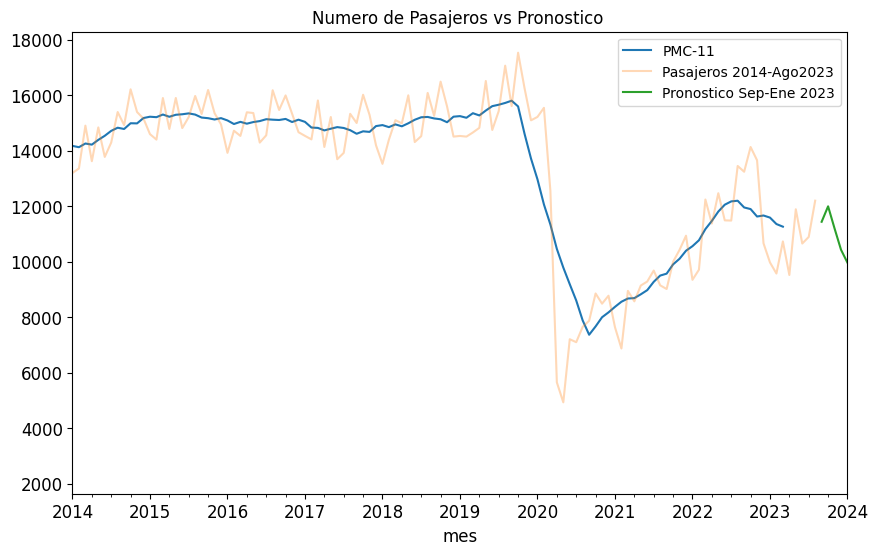

In [20]:
holtwinters_model = ExponentialSmoothing(metrorrey['miles de pasajeros'], trend='add', seasonal='mul', seasonal_periods=12).fit()
forecast_5month = holtwinters_model.forecast(5)
metrorrey["PMC-11"] = metrorrey['miles de pasajeros'].rolling(11, center=True).mean()
metrorrey['PMC-11'].plot(label='PMC-11')
metrorrey['miles de pasajeros'].plot(label='Pasajeros 2014-Ago2023', alpha=0.3)
forecast_5month.plot(label='Pronostico Sep-Ene 2023')
plt.legend()
plt.xlim('2014-01-01', '2024-01-01')
plt.title('Numero de Pasajeros vs Pronostico ')
plt.show()

In [21]:
pronostico = pd.DataFrame({
    'Pasajeros Estimados': forecast_5month})
pronostico['Ingresos estimados'] = pronostico['Pasajeros Estimados'] * 7.1
pronostico

,Pasajeros Estimados,Ingresos estimados
2023-09-01,11441.185911,81232.419972
2023-10-01,11998.364287,85188.386439
2023-11-01,11200.851863,79526.048227
2023-12-01,10433.610889,74078.637313
2024-01-01,9967.179612,70766.975244


6. Realiza   un   pronóstico de   los   miles   de   pasajeros con   el   modelo   ARIMA cumpliendo los siguientes pasos:

a. Realiza una prueba de raíz unitaria a la serie original (8.2 puntos)

In [22]:
# PRUEBA DICKEY FULLER AUMENTADA - RAIZ UNITARIA
prueba_DFA=adfuller(metrorrey['miles de pasajeros'])
pvalue=prueba_DFA[1]
print(pvalue.round(2))
if pvalue <= 0.05:
    print("Rechazamos la hipotesis nula, la serie es estacionaria")
else:
    print("No rechazamos la hipótesis nula, la serie no es estacionaria")

0.58
No rechazamos la hipótesis nula, la serie no es estacionaria


b. En caso de que no sea estacionaria aplica primeras diferencias, y realiza la prueba de raíz unitaria para verificar que la serie sea estacionaria (8.2 puntos)

In [23]:
# Primeras diferencias
metrorrey['1eras_diff'] = metrorrey['miles de pasajeros'].diff()
metrorrey.head()

,miles de pasajeros,ingresos (miles de pesos),PMC-7,PMC-11,1eras_diff
mes,,,,,
1995-01-01,3439.0,3240.0,NaN,NaN,NaN
1995-02-01,2879.0,3623.0,NaN,NaN,-560.0
1995-03-01,3103.0,3990.0,NaN,NaN,224.0
1995-04-01,3491.0,3321.0,3259.000000,NaN,388.0
1995-05-01,3109.0,3777.0,3170.857143,NaN,-382.0


In [24]:
prueba_DFA1=adfuller(metrorrey['1eras_diff'].dropna())
pvalue1= prueba_DFA1[1]
print(pvalue1.round(2))
if pvalue1 <= 0.05:
    print("Rechazamos la hipotesis nula, la serie es estacionaria")
else:
    print("No rechazamos la hipótesis nula, la serie no es estacionaria")

0.0
Rechazamos la hipotesis nula, la serie es estacionaria


d. Realiza  las  graficas  de  autocorrelación  de  la  serie  estacionaria  para verificar si la serie tiene o no un componente estacional (8.2 puntos)

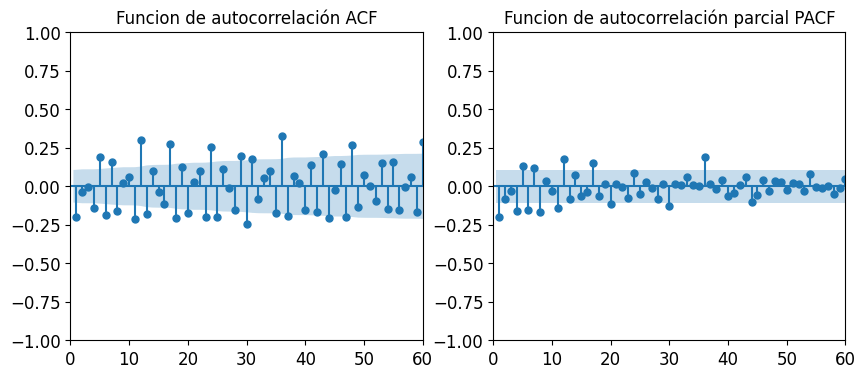

In [26]:
ig, ax = plt.subplots(1,2,figsize=(10,4))
# Primer subgrafica
plot_acf(metrorrey['1eras_diff'].dropna(),zero=False,lags=60,ax=ax[0],title='Funcion de autocorrelación ACF')
ax[0].set_ylim(-1,1)
ax[0].set_xlim(0,60)
# Segunda subgrafica
plot_pacf(metrorrey['1eras_diff'].dropna(),zero=False,lags=60,ax=ax[1],title='Funcion de autocorrelación parcial PACF')
ax[1].set_ylim(-1,1)
ax[1].set_xlim(0,60)
plt.show()

En la primera grafica, estamos mirando cuánto se parecen o estan relacionados los valores de la serie en diferentes momentos en el tiempo.
La segunda grafica se enfoca en mirar la correlación que no se explica por los momentos intermedios.

Ambas nos permiten entender como los valores de la serie estan relacionados en el tiempo.

SI tiene componente estacional


e. Utiliza auto_arima para encontrar el orden del modelo arima, dando el parámetro information_criterion prueba y muestra el resultado, con aic, bic, hqic, oob, en caso de que resulten diferente elegir aic si tu matricula termina en par, sino termina en par elegir uno distinto a aic. (8.2 puntos)

In [29]:
# Encontrar el orden del SARIMA (SI no tuviera componente estacional solo seria ARIMA) con AIC
pm.auto_arima(metrorrey['miles de pasajeros'],
              start_p = 1,
              start_q = 1,
              max_p = 7,
              max_q = 7,
              information_criterion = 'aic',
              seasonal = True,
              m = 12,
              start_P = 1,
              start_Q = 1,
              max_P = 7,
              max_Q = 7)

ARIMA(order=(1, 1, 3), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [30]:
# Con BIC
pm.auto_arima(metrorrey['miles de pasajeros'],
              start_p = 1,
              start_q = 1,
              max_p = 7,
              max_q = 7,
              information_criterion = 'bic',
              seasonal = True,
              m = 12,
              start_P = 1,
              start_Q = 1,
              max_P = 7,
              max_Q = 7)

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [31]:
# Con HQIC
pm.auto_arima(metrorrey['miles de pasajeros'],
              start_p = 1,
              start_q = 1,
              max_p = 7,
              max_q = 7,
              information_criterion = 'hqic',
              seasonal = True,
              m = 12,
              start_P = 1,
              start_Q = 1,
              max_P = 7,
              max_Q = 7),

(ARIMA(order=(2, 1, 0), scoring_args={}, seasonal_order=(1, 0, 1, 12),
       suppress_warnings=True, with_intercept=False),)

In [32]:
# Con OOB
pm.auto_arima(metrorrey['miles de pasajeros'],
              start_p = 1,
              start_q = 1,
              max_p = 7,
              max_q = 7,
              information_criterion = 'oob',
              seasonal = True,
              m = 12,
              start_P = 1,
              start_Q = 1,
              max_P = 7,
              max_Q = 7)

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:35: UserWarning: information_criterion cannot be 'oob' with out_of_sample_size = 0. Falling back to information criterion = aic.
  warnings.warn('information_criterion cannot be \'oob\' with '


ARIMA(order=(1, 1, 3), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

f. Mi matricula: 1902869
Al terminar en impar escogí el BIC, con  el  orden  del  modelo  arima  obtenido, estimaremos el modelo arima (8.2 puntos)

In [33]:
# Modelo BIC
model = ARIMA(metrorrey['miles de pasajeros'],
              order = (0,1,0),
              seasonal_order= (1,0,1,12))

results = model.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                 miles de pasajeros   No. Observations:                  344
Model:             ARIMA(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood               -2780.440
Date:                            Mon, 06 Nov 2023   AIC                           5566.880
Time:                                    02:51:44   BIC                           5578.394
Sample:                                01-01-1995   HQIC                          5571.466
                                     - 08-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.9728      0.023     42.860      0.000       0.928       1.017
ma.S.L12      -0.8414      0.049   

g. Realiza la gráfica del pronóstico a 5 meses con los intervalos de confianza y la serie original desde 2021 (8.2 puntos)

In [34]:
metrorrey['pasajeros arima'] = results.predict()

In [35]:
metrorrey.tail()

,miles de pasajeros,ingresos (miles de pesos),PMC-7,PMC-11,1eras_diff,pasajeros arima
mes,,,,,,
2023-04-01,9523.669,38799.657,10464.836857,NaN,-1210.233,9692.433033
2023-05-01,11891.646,58511.798,10782.866714,NaN,2367.977,10160.869509
2023-06-01,10657.712,55684.063,NaN,NaN,-1233.934,11487.306881
2023-07-01,10894.497,56378.304,NaN,NaN,236.785,10834.480458
2023-08-01,12201.982,57821.901,NaN,NaN,1307.485,11666.791449


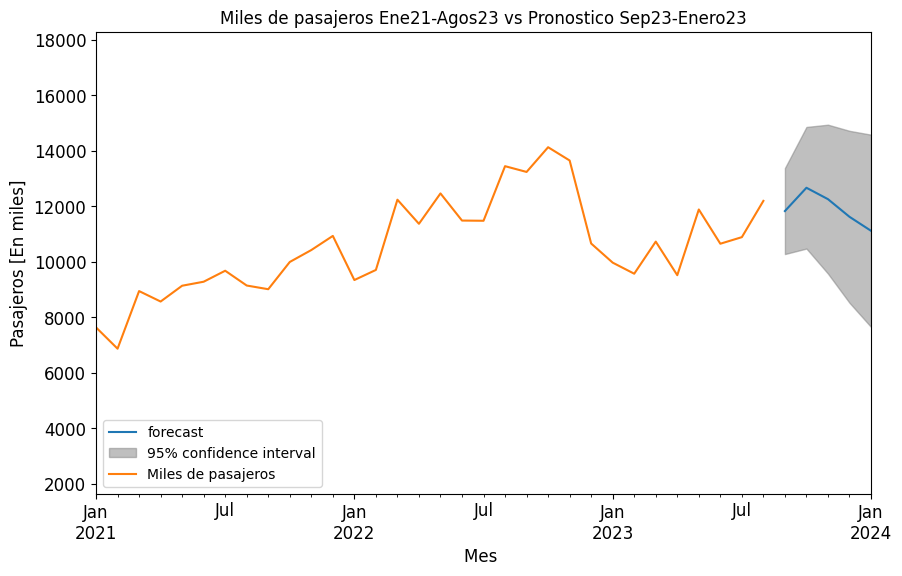

In [36]:
# Grafica del pronostico futuro
plot_predict(results,'2023-09-01','2024-01-01')
metrorrey['miles de pasajeros'].plot(label='Miles de pasajeros')
plt.xlim('2021-01-01', '2024-01-01')
plt.title('Miles de pasajeros Ene21-Agos23 vs Pronostico Sep23-Enero23')
plt.ylabel('Pasajeros [En miles]')
plt.xlabel('Mes ')
plt.legend(loc = 'lower left')
plt.show()

h. Realiza  el  pronostico  a  5  meses  con  los  intervalos  de  confianza(8.2 puntos)

In [37]:
forecast = results.get_forecast(steps=5) # septiembre, octubre, noviembre, diciembre, enero
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

inicio= '2023-09-01'
final= '2024-01-01'

pronostico_valor = forecast_mean[inicio:final]
pronostico_intervalos = forecast_ci.loc[inicio:final]

pronostico2 = pd.DataFrame({'Pronostico Pasajeros': pronostico_valor,
                              'Limite inferior': pronostico_intervalos.iloc[:,0],
                              'Limite superior': pronostico_intervalos.iloc[:,1]
                              })
pronostico2

,Pronostico Pasajeros,Limite inferior,Limite superior
2023-09-01,11835.040432,10285.512541,13384.568323
2023-10-01,12674.548657,10483.185298,14865.912016
2023-11-01,12263.784441,9579.923406,14947.645476
2023-12-01,11627.552188,8528.496406,14726.607970
2024-01-01,11123.199930,7658.350608,14588.049252


i. Calcula los ingresos y el intervalo de los ingreso multiplicando por $7.1 (8.2 puntos)

In [40]:
pronostico2['Ingresos'] = pronostico2['Pronostico Pasajeros'].round(2) * 7.1 * 1000
pronostico2

,Pronostico Pasajeros,Limite inferior,Limite superior,Ingresos
2023-09-01,11835.040432,10285.512541,13384.568323,84028784.0
2023-10-01,12674.548657,10483.185298,14865.912016,89989305.0
2023-11-01,12263.784441,9579.923406,14947.645476,87072838.0
2023-12-01,11627.552188,8528.496406,14726.607970,82555605.0
2024-01-01,11123.199930,7658.350608,14588.049252,78974720.0
